<a href="https://colab.research.google.com/github/minashareef/eeg-ocd-cnnmodel/blob/main/OCD_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.9 MB/s eta 0:00:00


In [ ]:
# Connecting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing
import mne
import pandas as pd
import os
import matplotlib.pyplot as plt
from mne.preprocessing import ICA

In [ ]:
directory = '/content/drive/MyDrive/sample_data'

**Reading and Filtering**

In [ ]:

import numpy as np
control= []
ocd = []
for filename in os.listdir(directory + '/CONTROL'):
    if filename.endswith('.vhdr'):
      filepath = os.path.join(directory +'/CONTROL', filename)
      raw = mne.io.read_raw_brainvision(filepath, preload=True)
      raw.set_montage('standard_1020')
      raw.filter(0.1, 40)
      raw.notch_filter(freqs=[50], verbose=True)
      control.append(raw)
for filename in os.listdir(directory + '/OCD'):
    if filename.endswith('.vhdr'):
      filepath = os.path.join(directory +'/OCD', filename)
      raw = mne.io.read_raw_brainvision(filepath, preload=True)
      raw.set_montage('standard_1020')
      raw.filter(0.1, 40)
      raw.notch_filter(freqs=[50], verbose=True)
      ocd.append(raw)


Extracting parameters from /content/drive/MyDrive/sample_data/OCD/aa2412_OCD_contamination_opened_closed_eyes.vhdr...
Setting channel info structure...


<ipython-input-5-40e9cb41ccf8>:15: RuntimeWarning: No coordinate information found for channels ['blood_pressure', 'GSR']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(filepath, preload=True)


Reading 0 ... 1002179  =      0.000 ...  2004.358 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 s)



<ipython-input-5-40e9cb41ccf8>:15: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['blood_pressure', 'GSR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Extracting parameters from /content/drive/MyDrive/sample_data/OCD/aap0308_OCD_pure_opened_closed_eyes.vhdr...
Setting channel info structure...


<ipython-input-5-40e9cb41ccf8>:15: RuntimeWarning: No coordinate information found for channels ['blood_pressure', 'GSR']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(filepath, preload=True)


Reading 0 ... 1526999  =      0.000 ...  3053.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 s)



<ipython-input-5-40e9cb41ccf8>:15: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['blood_pressure', 'GSR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG, 2 misc
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.1 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 65
 projs: []
 sfreq: 500.0 Hz
>
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG, 2 misc
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.1 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 65
 projs: []
 sfreq: 500.0 Hz
>
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


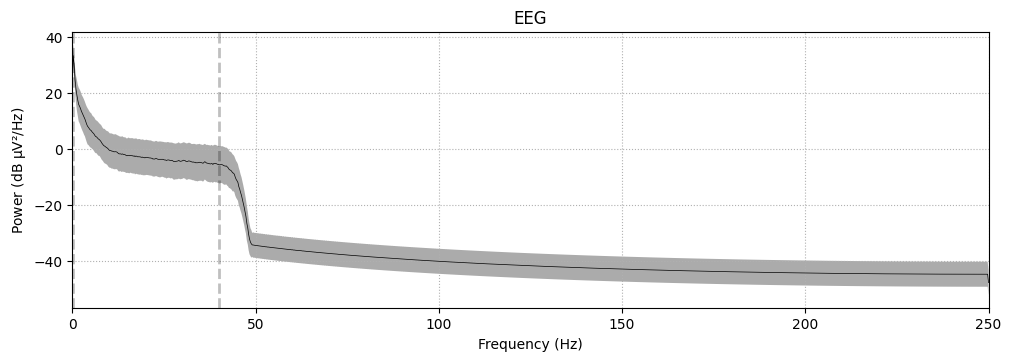

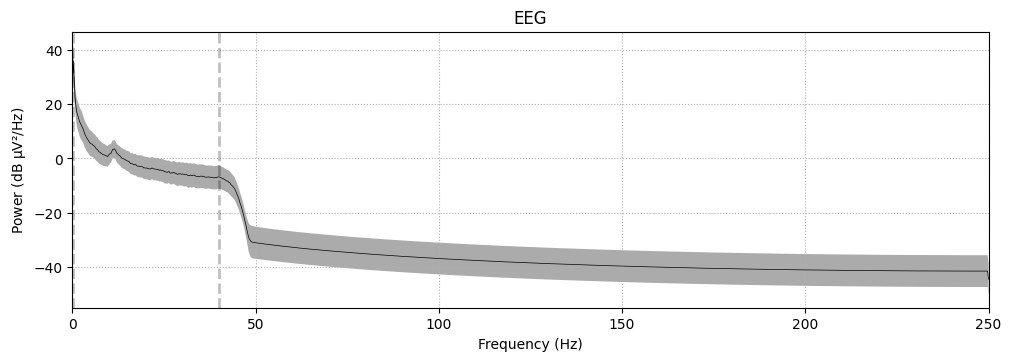

In [ ]:
for raw in ocd:
  print(raw.info)
  raw.plot_psd(average = True)
for raw in control:
  print(raw.info)
  raw.plot_psd(average = True)

**Independent Component Analysis**

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 93.1s.


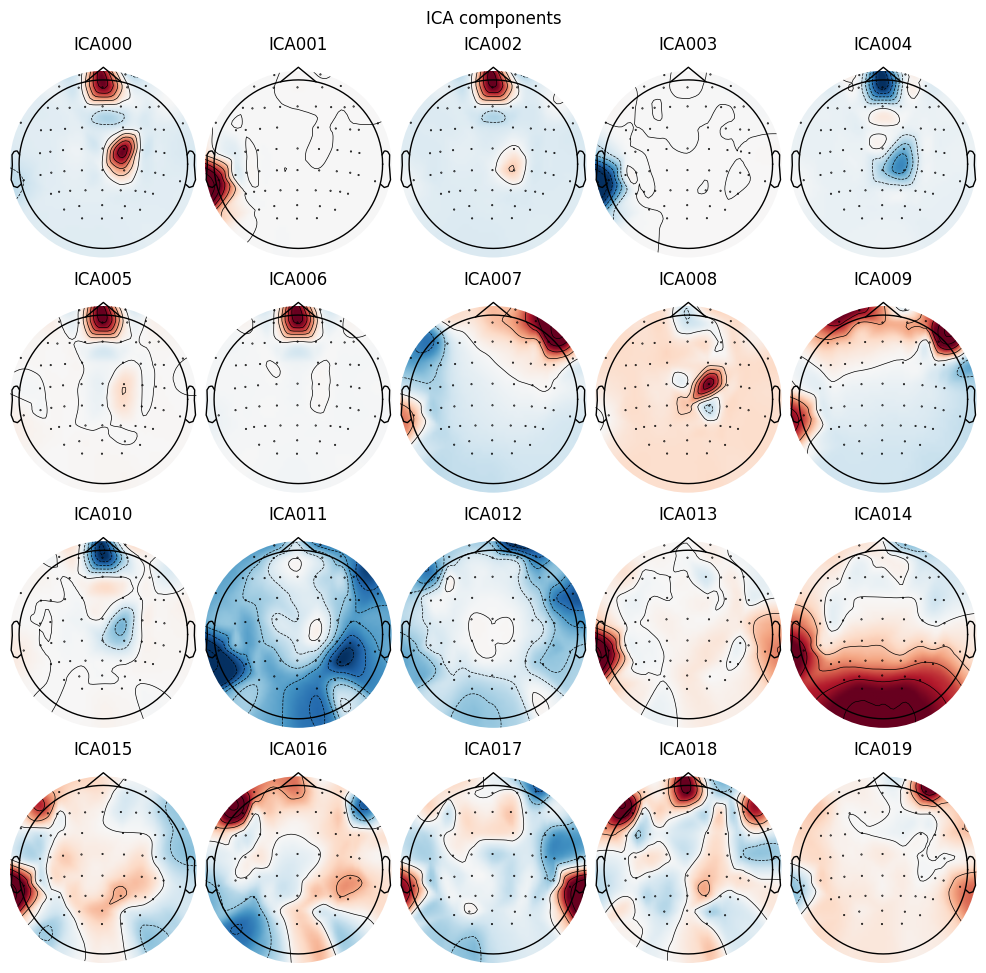

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Enter the 1st ica's you want the properties of 1
Enter the 2nd ica's you want the properties of 6
Enter the 3rd ica's you want the properties of 5
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated


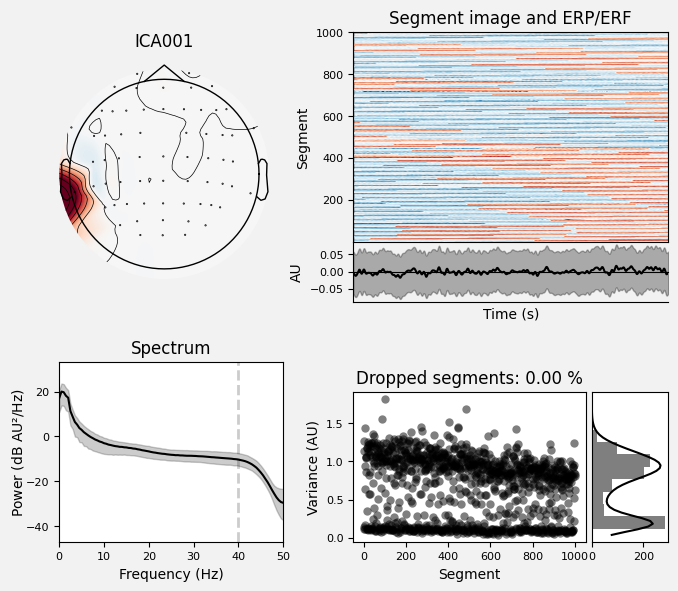

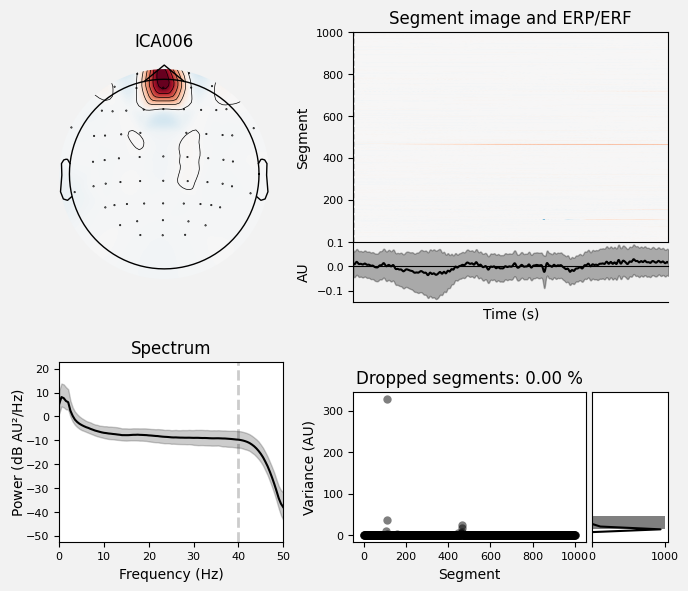

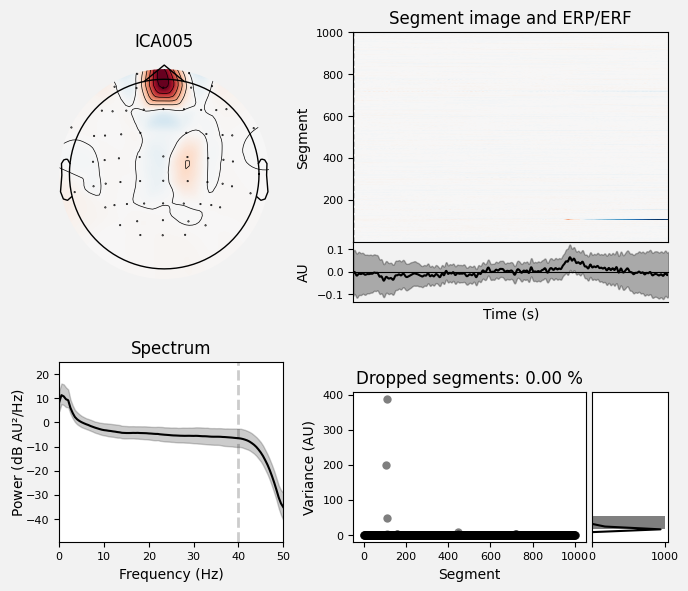

Give the 1st ica components with artifacts 1
Give the 2nd ica components with artifacts 6
Give the 3rd ica components with artifacts 5
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 63 PCA components
Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 133.0s.


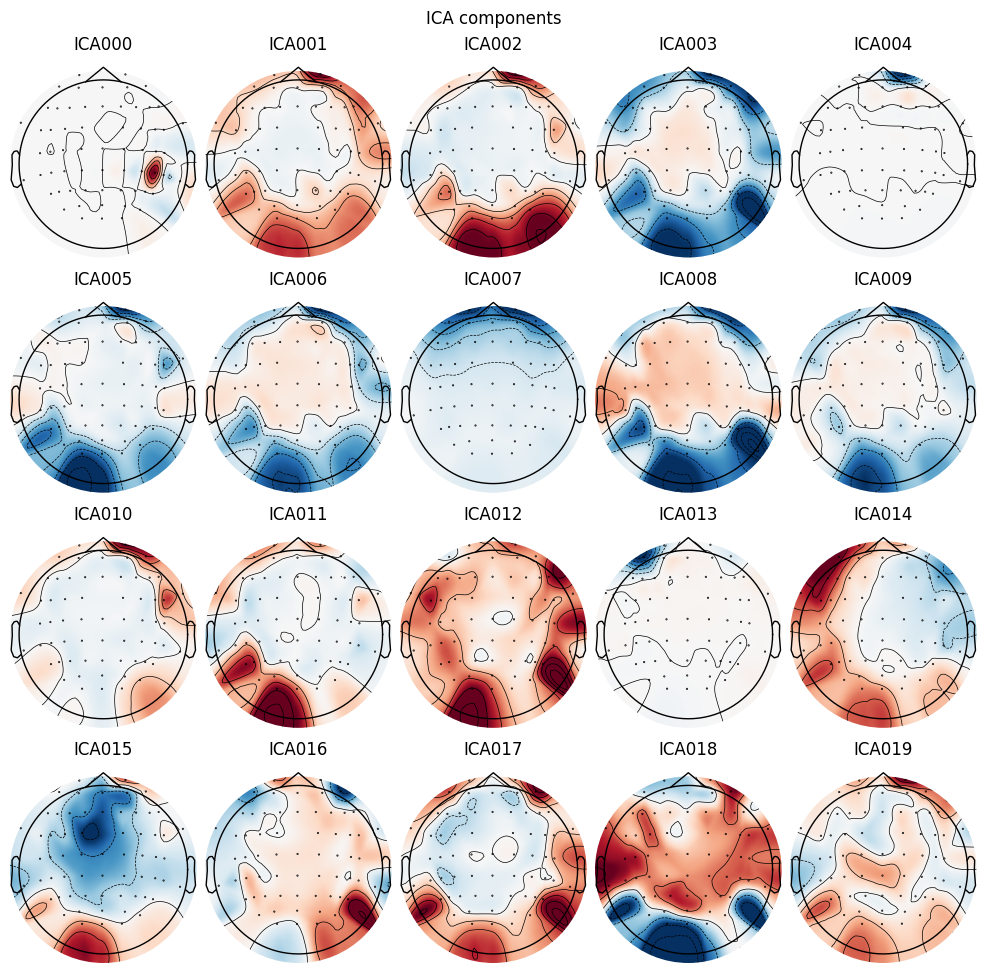

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Enter the 1st ica's you want the properties of 13
Enter the 2nd ica's you want the properties of 7
Enter the 3rd ica's you want the properties of 4
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1527 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1527 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1527 matching events found
No baseline correction applied
0 projection items activated


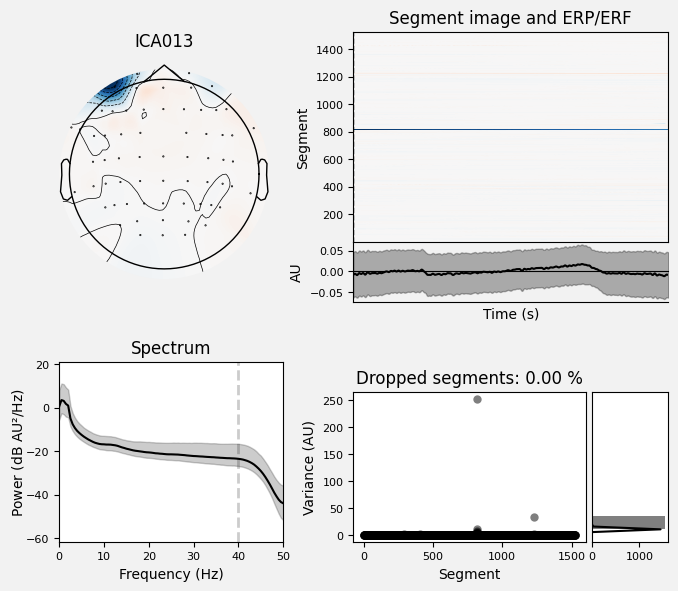

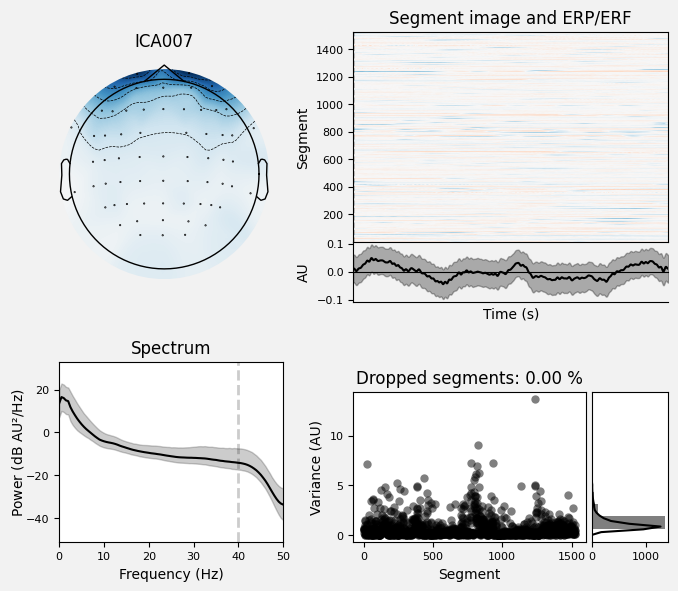

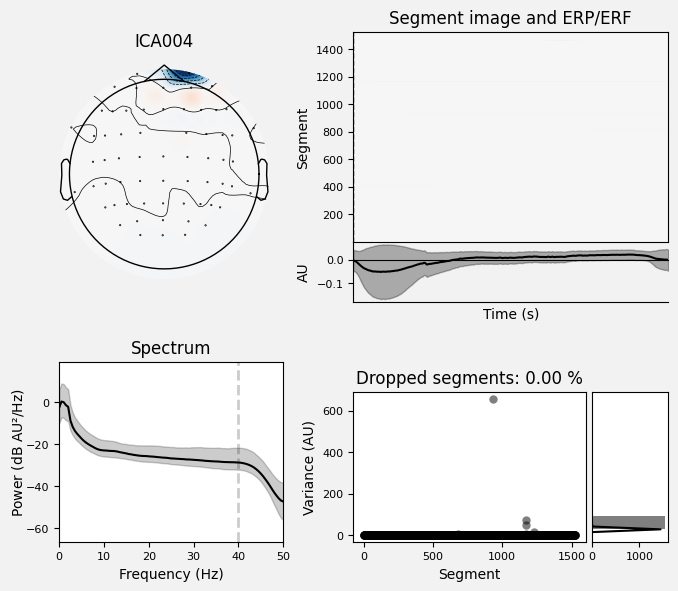

Give the 1st ica components with artifacts 13
Give the 2nd ica components with artifacts 7
Give the 3rd ica components with artifacts 4
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 63 PCA components


In [ ]:
for raw in ocd:
      ica_ocd = mne.preprocessing.ICA(n_components=20)
      ica_ocd.fit(raw)
      ica_ocd.plot_components()  # Inspect components
      ica_ocd.apply(raw)
      a = int(input("Enter the 1st ica's you want the properties of "))
      b = int(input("Enter the 2nd ica's you want the properties of "))
      c = int(input("Enter the 3rd ica's you want the properties of "))
      ica_ocd.plot_properties(raw, picks = [a,b,c])
      # write code to take input from useer of which component tod drop
      x = int(input("Give the 1st ica components with artifacts "))
      y = int(input("Give the 2nd ica components with artifacts "))
      z = int(input("Give the 3rd ica components with artifacts "))
      ica_ocd.exclude = [x,y,z]
      ica_ocd.apply(raw)

for raw in control:
      ica_control = mne.preprocessing.ICA(n_components=20)
      ica_control.fit(raw)
      ica_control.plot_components()  # Inspect components
      ica_control.apply(raw)
      a = int(input("Enter the 1st ica's you want the properties of "))
      b = int(input("Enter the 2nd ica's you want the properties of "))
      c = int(input("Enter the 3rd ica's you want the properties of "))
      ica_control.plot_properties(raw, picks = [a,b,c])
      # write code to take input from useer of which component tod drop
      x = int(input("Give the 1st ica components with artifacts "))
      y = int(input("Give the 2nd ica components with artifacts "))
      z = int(input("Give the 3rd ica components with artifacts "))
      ica_control.exclude = [x,y,z]
      ica_control.apply(raw)

# Check for these three types of artifacts
#1. eye blinks
#2. heart related components
#3. Bad channels



**Segmenting Data into Epochs**

In [ ]:
for raw in ocd:
  print(raw.annotations)
  print(raw.annotations.description)
  events, event_id = mne.events_from_annotations(raw)
  print("Event ids")
  print(event_id)

<Annotations | 1822 segments: New Segment/ (3), Stimulus/R 1 (60), ...>
['New Segment/' 'Time 0/' 'Stimulus/S 15' ... 'Stimulus/S 14'
 'Stimulus/S 15' 'Stimulus/R  4']
Used Annotations descriptions: ['New Segment/', 'Stimulus/R  1', 'Stimulus/R  3', 'Stimulus/R  4', 'Stimulus/S  1', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 16', 'Stimulus/S 17', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 24', 'Stimulus/S 25', 'Stimulus/S 27', 'Stimulus/S 30', 'Stimulus/S 31', 'Stimulus/S 33', 'Stimulus/S 34', 'Stimulus/S 35', 'Stimulus/S 37', 'Time 0/']
Event ids
{'New Segment/': 99999, 'Stimulus/R  1': 10001, 'Stimulus/R  3': 10002, 'Stimulus/R  4': 10003, 'Stimulus/S  1': 1, 'Stimulus/S  6': 6, 'Stimulus/S  7': 7, 'Stimulus/S 10': 10, 'Stimulus/S 11': 11, 'Stimulus/S 12': 12, 'Stimulus/S 13': 13, 'Stimulus/S 14': 14, 'Stimulus/S 15': 15, 'Stimulus/S 16': 16, '

In [ ]:
# Cutting Epochs

# S11 S21 S31 - Beginning of the fixation period
# S12 S22 S32 (200ms) - Overlap Period
# S10 S20 S30 (800ms) - Antisaccade Priod
# S14 S24 S34 (1min) - Feedback Question Period
# S15 S25 S35 (1000ms) - Black Screen Period

# take this epochs separately take for antisaccade and overlap period only and make a df
antisaccade_all_ocd = []
fixation_all_ocd = []
antisaccade_all_control = []
fixation_all_control = []
p_id = []
i = 0
for raw in ocd:
    events, event_id = mne.events_from_annotations(raw)
    antisaccade_event_ids = {'Stimulus/S 10':10, 'Stimulus/S 20':20, 'Stimulus/S 30':30}  # S10, S20, S30
    fixation_event_ids = {'Stimulus/S 11':11, 'Stimulus/S 21':21, 'Stimulus/S 31':31}  # S12, S22, S32

    antisaccade_epochs_ocd = mne.Epochs(raw, events, event_id = antisaccade_event_ids, tmin=-0.2, tmax=0.8, preload=True)
    fixation_epochs_ocd = mne.Epochs(raw, events, event_id = fixation_event_ids, tmin=-0.2, tmax=0.2, preload=True)

    antisaccade_data_ocd = antisaccade_epochs_ocd.get_data()
    fixation_data_ocd = fixation_epochs_ocd.get_data()

    antisaccade_all_ocd.append(antisaccade_data_ocd)
    fixation_all_ocd.append(fixation_data_ocd)
    p_id.append(i)
    i+=1
    print("Antisaccade Data Shape:", antisaccade_data_ocd.shape)
    print("Fixation Data Shape:", fixation_data_ocd.shape)


for raw in control:
    events, event_id = mne.events_from_annotations(raw)
    antisaccade_event_ids = {'Stimulus/S 10':10, 'Stimulus/S 20':20, 'Stimulus/S 30':30}  # S10, S20, S30
    fixation_event_ids = {'Stimulus/S 11':11, 'Stimulus/S 21':21, 'Stimulus/S 31':31}  # S12, S22, S32

    antisaccade_epochs_control = mne.Epochs(raw, events, event_id = antisaccade_event_ids, tmin=-0.2, tmax=0.8, preload=True)
    fixation_epochs_control = mne.Epochs(raw, events, event_id = fixation_event_ids, tmin=-0.2, tmax=0.2, preload=True)

    antisaccade_data_control = antisaccade_epochs_control.get_data() # epochs, channels, timepoints
    fixation_data_control = fixation_epochs_control.get_data()

    antisaccade_all_control.append(antisaccade_data_control)
    fixation_all_control.append(fixation_data_control) # samples, epochs, channels, timepoints

    print("Antisaccade Data Shape:", antisaccade_data_control.shape)
    print("Fixation Data Shape:", fixation_data_control.shape)




Used Annotations descriptions: ['New Segment/', 'Stimulus/R  1', 'Stimulus/R  3', 'Stimulus/R  4', 'Stimulus/S  1', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 16', 'Stimulus/S 17', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 24', 'Stimulus/S 25', 'Stimulus/S 27', 'Stimulus/S 30', 'Stimulus/S 31', 'Stimulus/S 33', 'Stimulus/S 34', 'Stimulus/S 35', 'Stimulus/S 37', 'Time 0/']
Not setting metadata
175 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 175 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
301 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 301 events and 201 original

In [ ]:

for data in antisaccade_all_ocd:
    print("Shape of Antisaccade OCD",data.shape)

for data in fixation_all_ocd:
    print("Shape of Fixation OCD" ,data.shape)

for data in antisaccade_all_control:
    print("Shape of Antisaccade Control", data.shape)

for data in fixation_all_control:
    print("Shape of Fixation Control", data.shape)


(301, 65, 501)
(301, 65, 501)
(301, 65, 201)
(301, 65, 201)


In [ ]:
# Padding of antisaccade_all_ocd, antisaccade_all_control, fixation_all_ocd, fixation_all_control
# Determine maximum shapes
max_antisaccade_epochs = max([data.shape[0] for data in antisaccade_all_ocd])
max_fixation_epochs = max([data.shape[0] for data in fixation_all_ocd])

max_antisaccade_epochs = max(data.shape[0] for data in antisaccade_data_control)
max_fixation_epochs = max(data.shape[0] for data in fixation_data_control)

max_epochs = max([max_antisaccade_epochs, max_fixation_epochs, max_antisaccade_epochs, max_fixation_epochs])

for i in range(len(antisaccade_all_ocd)):
    if antisaccade_all_ocd[i].shape[0] < max_epochs:
        pad_epochs = max_epochs - antisaccade_all_ocd[i].shape[0]
        antisaccade_all_ocd[i] = np.pad(antisaccade_all_ocd[i],
                                        ((0, pad_epochs), (0, 0), (0, 0)),
                                        'constant', constant_values=0)

for i in range(len(fixation_all_ocd)):
    if fixation_all_ocd[i].shape[0] < max_epochs:
        pad_epochs = max_epochs - fixation_all_ocd[i].shape[0]
        fixation_all_ocd[i] = np.pad(fixation_all_ocd[i],
                                     ((0, pad_epochs), (0, 0), (0, 0)),
                                     'constant', constant_values=0)


for i in range(len(antisaccade_all_control)):
    if antisaccade_all_control[i].shape[0] < max_epochs:
        pad_epochs = max_epochs - antisaccade_all_control[i].shape[0]
        antisaccade_all_control[i] = np.pad(antisaccade_all_control[i],
                                        ((0, pad_epochs), (0, 0), (0, 0)),
                                        'constant', constant_values=0)

for i in range(len(fixation_all_control)):
    if fixation_all_control[i].shape[0] < max_epochs:
        pad_epochs = max_epochs - fixation_all_control[i].shape[0]
        fixation_all_ocd[i] = np.pad(fixation_all_control[i],
                                     ((0, pad_epochs), (0, 0), (0, 0)),
                                     'constant', constant_values=0)


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


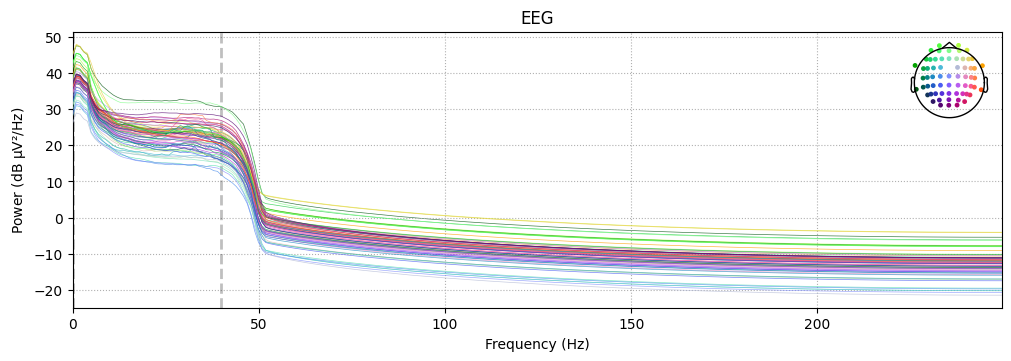

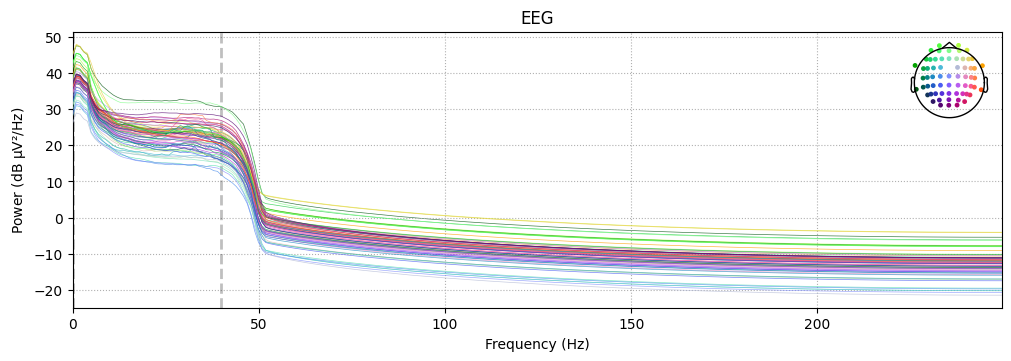

In [ ]:
antisaccade_epochs.compute_psd().plot(picks = 'eeg')

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...
converting legacy list-of-tuples input to a dict for the `bands` parameter


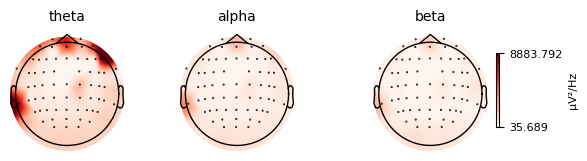

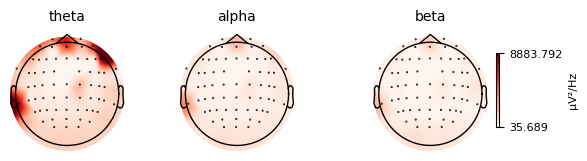

In [ ]:
band = [(4,8 ,'theta'),(8,12,'alpha') , (12,30,'beta' )]
antisaccade_epochs.plot_psd_topomap(bands=band, vlim='joint')

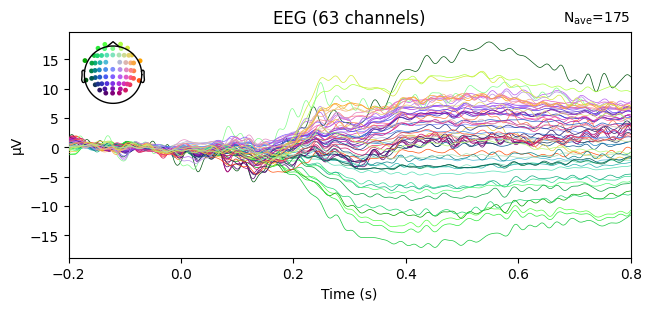

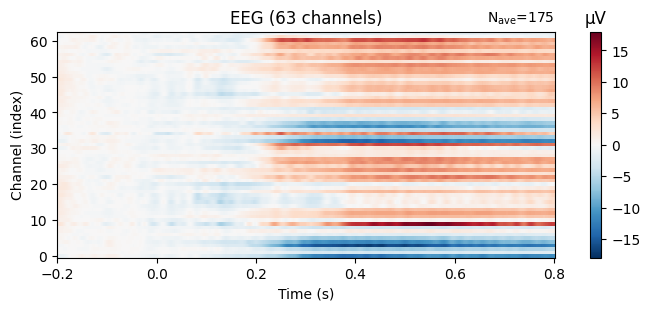

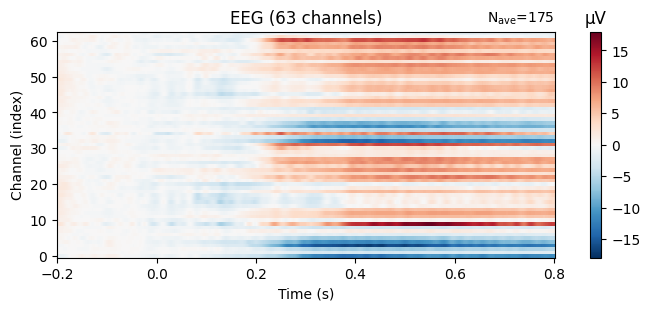

In [ ]:
antisaccade_evoked = antisaccade_epochs.average()
antisaccade_evoked.plot()
antisaccade_evoked.plot_image()

In [ ]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.7 MB/s eta 0:00:00


In [ ]:
# do the feature extraction - wavelet transform

import pywt
import numpy as np

def apply_wavelet_transform(data, wavelet='cmor', scales = [2,4, 8, 12, 30]):
    """
    Apply Continuous Wavelet Transform (CWT) on EEG data.
    :param data: EEG data of shape (epochs, channels, timepoints)
    :return: Wavelet transformed data of shape (epochs, channels, scales, timepoints)
    """
    transformed_data = []
    for epoch in data:
        transformed_epoch = []
        for channel in epoch:
            coeffs, _ = pywt.cwt(channel, scales, wavelet)  # CWT on single channel
            transformed_epoch.append(coeffs)
        transformed_data.append(np.array(transformed_epoch))
    return transformed_data



In [ ]:
antisaccade_wavelet_all_control = []
fixation_wavelet_all_control = []
antisaccade_wavelet_all_ocd = []
fixation_wavelet_all_ocd = []

for data in antisaccade_all_control:
    wavelet_data = apply_wavelet_transform(data) #(epochs, channels, scales, timepoints)
    antisaccade_wavelet_all_control.append(wavelet_data)

for data in fixation_all_control:
    wavelet_data = apply_wavelet_transform(data)
    fixation_wavelet_all_control.append(wavelet_data)


for data in antisaccade_all_ocd:
    wavelet_data = apply_wavelet_transform(data)
    antisaccade_wavelet_all_ocd.append(wavelet_data)


# number of samples = no of people(p_id) - check
# size of all anti/fix data same - padding

for data in fixation_all_ocd:
    wavelet_data = apply_wavelet_transform(data)
    fixation_wavelet_all_ocd.append(wavelet_data)



/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


In [ ]:
fixation_wavelet_all_ocd = np.array(fixation_wavelet_all_ocd)
print(fixation_wavelet_all_ocd.shape)
antisaccade_wavelet_all_ocd = np.array(antisaccade_wavelet_all_ocd)
print(antisaccade_wavelet_all_ocd.shape)

(2, 301, 65, 5, 201)
(2, 301, 65, 5, 501)


In [ ]:
# OCD Data: Concatenate along time axis (axis=4)
ocd_X = np.concatenate((fixation_wavelet_all_ocd, antisaccade_wavelet_all_ocd), axis=4)  # Shape: (2, 301, 65, 5, 702)

# Control Data: Concatenate along time axis (axis=4)
control_X = np.concatenate((fixation_wavelet_all_control, antisaccade_wavelet_all_control), axis=4)  # Shape: (2, 301, 65, 5, 702)

print(ocd_X.shape)      # Expected: (2, 301, 65, 5, 702)
print(control_X.shape)  # Expected: (2, 301, 65, 5, 702)

(2, 301, 65, 5, 702)


**Combining Data and Making a Dataset**

In [ ]:
X = np.stack((ocd_X, control_X), axis=0)

num_ocd = ocd_X.shape[0]
num_control = control_X.shape[0]
y = np.concatenate((np.zeros((num_ocd, 1)), np.ones((num_control, 1))), axis=0)

**Applying CNN Model to the dataset**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
print(X.shape, y.shape) # (4, 301, 65, 5, 702), (4,1)

In [ ]:
# Define a 3D CNN model
model = Sequential([
    Conv3D(32, (3, 3, 3), activation='relu', input_shape=(301, 65, 5, 702)),
    MaxPooling3D((2, 2, 2)),

    Conv3D(64, (3, 3, 3), activation='relu'),
    MaxPooling3D((2, 2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=20, batch_size=1, validation_split=0.5)  # Small dataset, batch_size = 1

# Print model summary
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y )

print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

**_____________END_____________**